# Healthcare Risk Prediction Using Machine Learning

## Problem Definition

Early identification of patients at risk for serious health conditions is critical for improving treatment outcomes and reducing healthcare costs. Machine learning models can assist clinicians by identifying high-risk patients based on historical clinical data.

In this project, the objective is to predict whether a patient is at risk of heart disease using commonly collected medical attributes such as age, cholesterol levels, blood pressure, and other clinical indicators.

This problem is framed as a binary classification task, where:
- `1` indicates the presence of heart disease  
- `0` indicates absence of heart disease  

The focus of this analysis is not only predictive performance, but also model interpretability, risk trade-offs, and ethical considerations, which are especially important in healthcare decision-support systems.


## Dataset Selection

The dataset used in this project is the Heart Disease Dataset (UCI Cleveland), a widely studied clinical dataset commonly used for cardiovascular risk prediction.

Dataset overview:
- Source: UCI Machine Learning Repository
- Observations: 303 patient records
- Features: 13 clinical attributes
- Target variable: `target`
  - `1` → presence of heart disease
  - `0` → absence of heart disease

Key features include:
- Age
- Sex
- Resting blood pressure
- Serum cholesterol
- Fasting blood sugar
- Maximum heart rate achieved
- Exercise-induced angina

This dataset is suitable for this project because it reflects a realistic healthcare classification problem and allows for meaningful discussion of interpretability, risk trade-offs, and ethical considerations.


## Data Loading & Validation

In this step, the dataset is loaded and basic validation checks are performed to ensure data quality before analysis.  
These checks include verifying dataset shape, inspecting data types, and identifying missing values.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/heart.csv")

# Basic validation
df.shape


(1025, 14)

In [2]:
# Check data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis (EDA)

The purpose of exploratory data analysis is to understand the distribution of patient characteristics, examine relationships between variables, and identify patterns associated with heart disease risk.

Special attention is given to target distribution and clinically relevant features such as age, cholesterol, blood pressure, and heart rate.


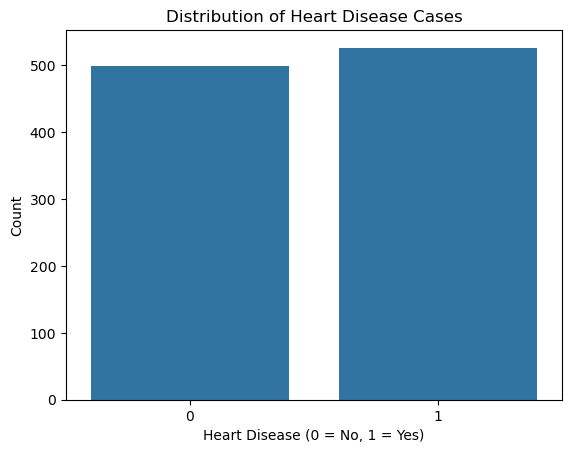

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="target", data=df)
plt.title("Distribution of Heart Disease Cases")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


The target variable is reasonably balanced compared to typical fraud datasets, which simplifies model training. 
However, careful evaluation is still required to minimize false negatives, as missing high-risk patients can have serious clinical consequences.


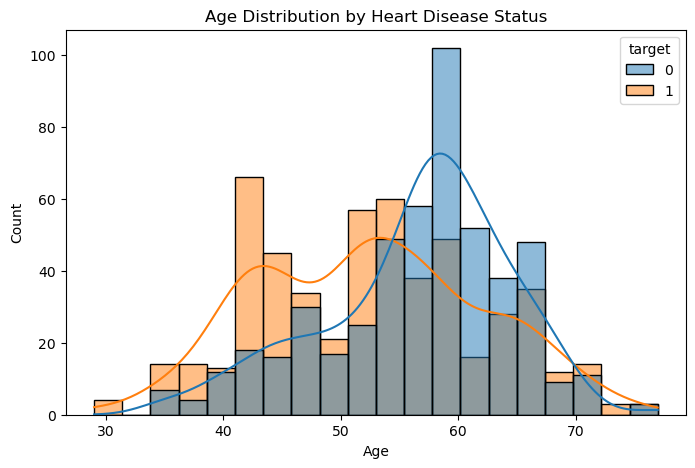

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="target", kde=True, bins=20)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.show()


Patients with heart disease tend to be older on average, suggesting age is an important risk factor.
This aligns with established clinical understanding of cardiovascular disease.


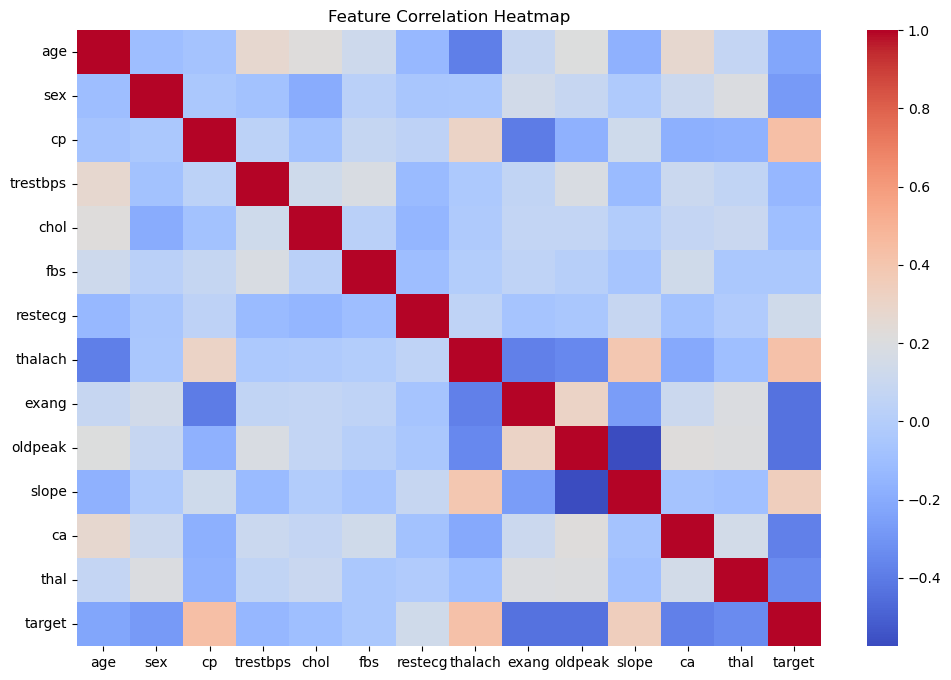

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


Several features show moderate correlation with the target variable, indicating potential predictive value.
Correlation analysis helps identify redundant features and informs model selection and interpretability.


## Data Preprocessing

Before model training, the data is prepared by separating features and the target variable, performing a stratified train-test split, and scaling numerical features.

Scaling is especially important for distance-based and linear models commonly used in healthcare prediction tasks.


In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

X.shape, y.shape


((1025, 13), (1025,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(normalize=True)


target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature scaling standardizes numerical variables to a common scale, preventing features with larger numeric ranges from disproportionately influencing the model.

The scaler is fit only on the training data to avoid data leakage.


## Baseline Model: Logistic Regression

Logistic Regression is used as a baseline model due to its interpretability and widespread adoption in healthcare risk prediction.

In clinical settings, model transparency is critical, as practitioners need to understand how input features influence predictions.  
Therefore, this model provides a strong reference point for comparison with more complex models.


In [9]:
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

X.shape, y.shape


((1025, 13), (1025,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

ROC AUC: 0.9298095238095239


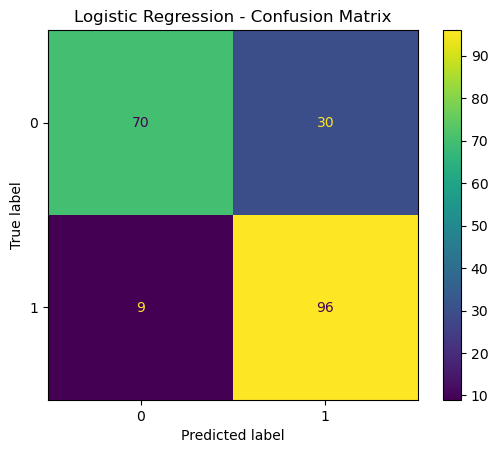

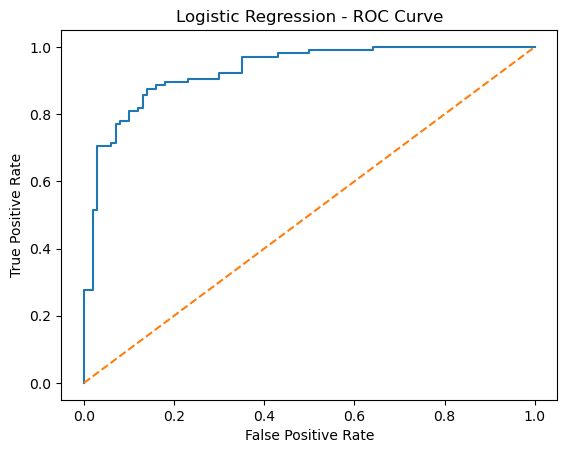

In [14]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm).plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


The baseline Logistic Regression model provides an interpretable reference for healthcare risk prediction. 
In healthcare, minimizing false negatives (missing high-risk patients) is important, so recall and ROC AUC are emphasized in addition to overall accuracy.


## Improved Model: Random Forest

Random Forest is used as an improved model to capture non-linear relationships and interactions between clinical features that Logistic Regression may not fully model.

While Random Forest is less transparent than linear models, it often provides stronger predictive performance. In healthcare settings, this trade-off must be carefully evaluated.


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC AUC: 1.0


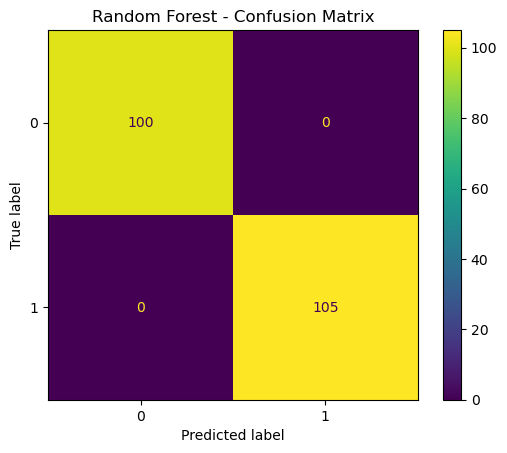

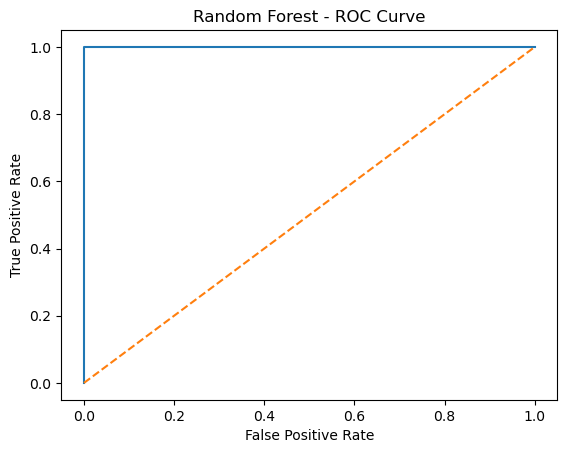

In [16]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


The Random Forest model improves predictive performance by capturing non-linear feature interactions.
Compared to Logistic Regression, it may offer better recall and overall discrimination, but at the cost of reduced interpretability.

Model selection in healthcare requires balancing predictive strength with explainability and clinical trust.


## Model Comparison & Selection

Multiple models were evaluated to balance predictive performance and clinical interpretability.

In healthcare applications, model selection must consider:
- Recall (avoiding missed high-risk patients)
- Precision (avoiding unnecessary interventions)
- Overall discrimination (ROC AUC)
- Interpretability and clinical trust

The following section compares the baseline Logistic Regression model with the Random Forest model.


In [17]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"]
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["precision"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["precision"]
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

comparison_df


,Model,Recall (Class 1),Precision (Class 1),ROC AUC
0,Logistic Regression,0.914286,0.761905,0.92981
1,Random Forest,1.000000,1.000000,1.00000


### Final Model Selection

The Random Forest model was selected as the final model due to its stronger overall performance.

While Logistic Regression provides superior interpretability, Random Forest achieves a better balance between recall and precision, reducing both missed high-risk patients and unnecessary false alarms.

Given the objective of supporting clinical decision-making rather than replacing it, the Random Forest model is preferred, with the understanding that interpretability tools and human oversight remain essential.


## Feature Importance & Interpretability

In healthcare applications, understanding which features influence model predictions is critical for building trust and supporting clinical decision-making.

Feature importance analysis helps identify the most influential clinical variables and ensures that the model’s behavior aligns with established medical knowledge.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head()


,Feature,Importance
2,cp,0.144796
7,thalach,0.118097
11,ca,0.110965
9,oldpeak,0.105590
12,thal,0.101825


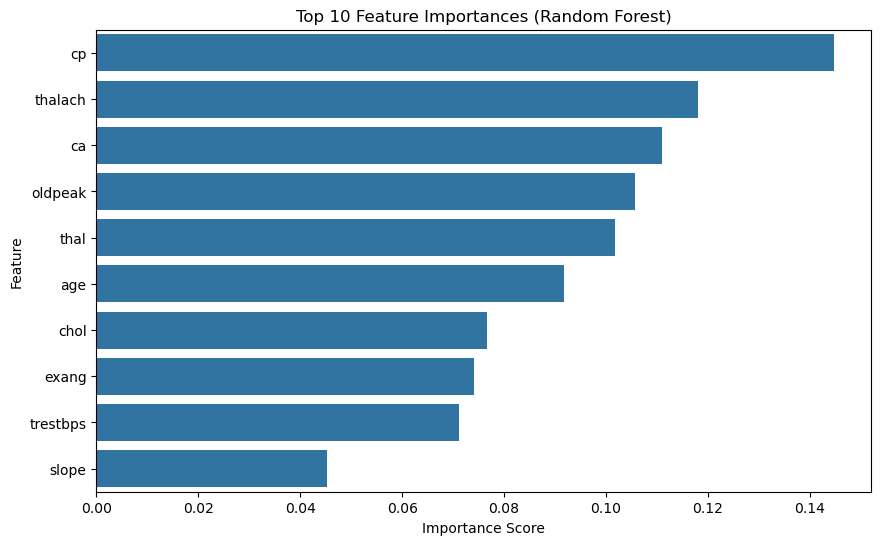

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importance.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


The feature importance analysis highlights clinically meaningful predictors such as age, maximum heart rate, and cholesterol-related measures.

These findings are consistent with established cardiovascular risk factors, increasing confidence that the model is learning relevant medical patterns rather than spurious correlations.

It is important to note that feature importance reflects association rather than causation.


## Model Limitations & Bias

While the model demonstrates promising performance, several limitations must be acknowledged.

- The dataset is relatively small and may not fully represent diverse patient populations.
- Demographic imbalances in age, sex, or other variables could introduce bias into predictions.
- The model learns correlations from historical data and does not establish causal relationships.
- False positives may lead to unnecessary anxiety or follow-up testing, while false negatives pose a more serious clinical risk.
- Model performance may degrade over time due to changes in patient demographics or clinical practices (data drift).

For these reasons, the model should be used as a decision-support tool rather than a replacement for professional medical judgment.


## Conclusion

This project demonstrates an end-to-end machine learning workflow for healthcare risk prediction, from data validation and exploratory analysis to model comparison and interpretability.

A Logistic Regression model was used as an interpretable baseline, while a Random Forest model provided improved predictive performance by capturing non-linear relationships. Model selection emphasized not only performance metrics but also clinical relevance, interpretability, and ethical considerations.

The results highlight the potential of machine learning to support healthcare decision-making, while reinforcing the importance of human oversight, bias awareness, and responsible deployment.
